In [12]:
import pandas as pd
#read csv
df = pd.read_csv('CORD19_abstract.csv')
df.head()


,title,target
0,Clinical features of culture-proven Mycoplasma...,0
1,Nitric oxide: a pro-inflammatory mediator in l...,0
2,Surfactant protein-D and pulmonary host defense,0
3,Role of endothelin-1 in lung disease,0
4,Gene expression in epithelial cells in respons...,0


In [13]:
#drop rows with missing values
df = df.dropna()
df.head()


,title,target
0,Clinical features of culture-proven Mycoplasma...,0
1,Nitric oxide: a pro-inflammatory mediator in l...,0
2,Surfactant protein-D and pulmonary host defense,0
3,Role of endothelin-1 in lung disease,0
4,Gene expression in epithelial cells in respons...,0


In [15]:
df = df[df['title'].str.contains('covid')]
df.head()

,title,target
11779,"Scope, quality, and inclusivity of clinical gu...",1
25959,Moral panic about “covidiots” in Canadian news...,1
31336,Commentary to the paper: Association of smokin...,1
46437,The pathogenesis of thromboembolic disease in ...,1
49266,Music and the internet in the age of covid-19,1


Hi , Kevin Mastascusa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821118 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 no

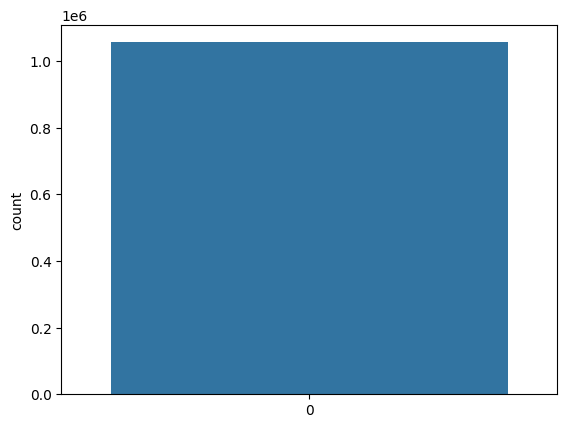

 ------------------------------------ 
 ------------------------------------ 
MARKER 2
 ------------------------------------ 
 ------------------------------------ 
Data Preprocessing:
NUMPY ARRAY CONVERSION:
Convert the dataframe to numpy array:
Print the numpy array:
[['Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia'
  0]
 ['Nitric oxide: a pro-inflammatory mediator in lung disease?' 0]
 ['Surfactant protein-D and pulmonary host defense' 0]
 ...
 ['A Patient With Bilateral Conjunctivitis Positive for SARS-CoV-2 RNA in a Conjunctival Sample'
  0]
 ['Incidental lowering of otitis-media complaints in otitis-prone children during COVID-19 pandemic: not all evil comes to hurt'
  1]
 ['Hospital variation in admissions to neonatal intensive care units by diagnosis severity and category'
  0]]
Print the shape of the numpy array:
(1056157, 2)
Print the type of the numpy array:
<class 'numpy.ndarray'>
Print the f

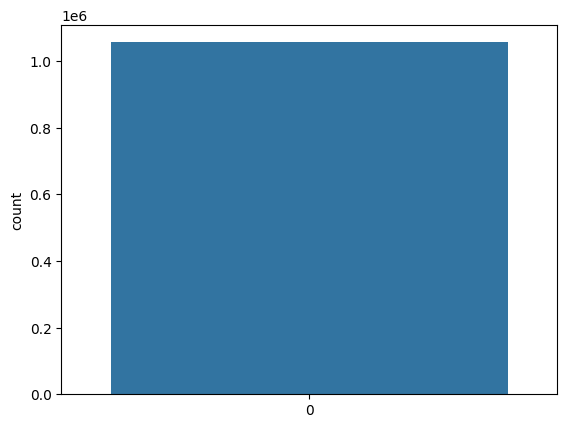

 ------------------------------------ 
 ------------------------------------ 
KNN:
Import the libraries:
Create the features and labels:
Split the data into training and testing sets:
Initialize the TfidfVectorizer:
Fit and transform the training data:
Transform the test set:
Initialize the KNN classifier:
Fit the model:
Predict on the test set:


KeyboardInterrupt: 

In [2]:
# PROGRAM HEADER NAME: KEVIN MASTASCUSA DESCRIPTION: This program is a data science project that uses the CORD-19
# dataset to perform sentiment analysis on the abstracts of the papers. The program will use the abstracts to
# determine if the paper is about COVID-19 or not. DATE: VERSION: 1.0 USAGE: python main.py
# ================================================================================================================

# Import the required libraries
import math  # For mathematical operations
import random  # For random number generation
import os  # For file operations
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For mathematical calculations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For data visualization
import warnings  # To ignore any warnings
import nltk  # Natural Language Toolkit
import re  # For regular expressions
import string  # For string operations
from nltk.corpus import stopwords  # To identify and remove the stopwords
from nltk.stem.porter import PorterStemmer  # To perform stemming
from nltk.tokenize import word_tokenize  # To create tokens from text
from nltk.stem import WordNetLemmatizer  # To perform lemmatization

from sklearn.feature_extraction.text import CountVectorizer  # For feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer  # For feature extraction
from sklearn.model_selection import train_test_split  # To split the data into train and test set
from sklearn.metrics import accuracy_score, confusion_matrix, \
    classification_report  # To measure how well the model is performing
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier

# nltk.download('punkt')  # punkt is a pre-trained model that helps you tokenize words and sentences
# nltk.download('wordnet')  # wordnet is a lexical database for the English language
# nltk.download('stopwords')  # stopwords are the words in any language which does not add much meaning to a sentence

warnings.filterwarnings('ignore')
import nltk


# nltk.download()


def print_hi(name):
    """
    This function prints the name of the user



    :param name:
    """
    print(f'Hi , {name}')


def main():
    print(f'Welcome to the CORD-19 Sentiment Analysis Project')
    print(f'Please select an option from the menu below')
    print(f'1. Perform Sentiment Analysis on the CORD-19 Dataset')
    print(f'2. Exit')
    choice = int(input(f'Enter your choice: '))
    if choice == 1:
        print(f'Performing Sentiment Analysis on the CORD-19 Dataset')
        print(f'Please wait while the program loads the dataset')
    if choice == 2:
        print(f'Exiting the program')
        exit()
    else:
        print(f'Invalid choice. Please try again')
        main()


def clean_text(text):
    """
    This function performs the following operations:
    1. Removes the punctuations
    2. Removes the stopwords
    3. Performs stemming
    4. Performs lemmatization

    :param text:
    :return:

    Example:
    Input: "This is a sample text!!!"

    Output: "sample text"
    """
    # Remove the punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert the text to lowercase
    text = text.lower()
    # Create tokens from the text
    tokens = word_tokenize(text)
    # Remove the stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens to form the text
    text = ' '.join(tokens)
    return text


# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    """
    Function to plot the confusion matrix


    :param y_test:
    :param y_pred:
    :return:
    """

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()


# KNN
# Function to train the KNN model
def train_knn(X_train, y_train, k):
    """
    Function to train the KNN model

    :param X_train:
    :param y_train:
    :param k:
    :return:
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn


# Function to test the KNN model
def test_knn(knn, X_test):
    """
    Function to test the KNN model

    :param knn:
    :param X_test:
    :return:
    """
    y_pred = knn.predict(X_test)
    return y_pred


# Function to perform KNN classification
def knn_classification(X_train, y_train, X_test, y_test, k):
    """
    Function to perform KNN classification

    :param X_train:

    :param y_train:
    :param X_test:
    :param y_test:
    :param k:
    :return:
    """
    knn = train_knn(X_train, y_train, k)
    y_pred = test_knn(knn, X_test)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)


# Naive Bayes
# Function to train the Naive Bayes model
def train_naive_bayes(X_train, y_train):
    """
    Function to train the Naive Bayes model
  :param X_train:
    :param y_train:
    :return:
    """
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    return nb


# Function to test the Naive Bayes model
def test_naive_bayes(nb, X_test):
    """
    Function to test the Naive Bayes model

    :param nb:
    :param X_test:
    :return:
    """
    y_pred = nb.predict(X_test)
    return y_pred


# Create Class Attribute For Target Variable
def create_class_attribute(df):
    """
    Create Class Attribute For Target Variable


    :param df:
    :return:
    """

    df['class'] = df['Sentiment'].apply(lambda x: 1 if x == 'covid-19' else 0)
    return df


# Create Sentiment Description Attribute For Target Variable
def create_sentiment_description_attribute(df):
    """
    Create Sentiment Description Attribute For Target Variable

    :param df:
    :return:
    """
    df['Sentiment_Description'] = df['Sentiment'].apply(lambda x: 'Positive' if x == 'covid-19' else 'Negative')
    return df


# CREATE DOMAIN ATTRIBUTE FOR TARGET VARIABLE
def create_domain_attribute(df):
    """
    CREATE DOMAIN ATTRIBUTE FOR TARGET VARIABLE

    :param df:
    :return:
    """

    df['Domain'] = df['Sentiment'].apply(lambda x: 'COVID-19' if x == 'covid-19' else 'Other')
    return df


# Function to Preprocess the data
def preprocess_data(df):
    # Remove the rows with missing values
    df.dropna(inplace=True)
    # Remove the duplicates
    df.drop_duplicates(inplace=True)
    # Remove the rows with the class label as 'other'
    df = df[df['Sentiment'] != 'other']
    # Clean the text
    df['cleaned_text'] = df['Abstract'].apply(clean_text)
    return df


'''
#  You have: Data with a set of feature attributes and class attributes. Data pre-processing methods:
# Binary, TF, TFIDF, WordsToKeep Models: KNN, Naïve Bayes, Decision Tree Your experiment design should to: Choose the
# class attribute (Sentiment or Sentiment_Description) Choose subsets of feature attributes Choose pre-processing
# methods Choose different K for KNN Choose Naïvebayes or NaivebayesMultinomialText Choose different parameters,
# such as minNumObj, subtree raising, for the decision tree model, J48 For different combinations of the above choices,
# run the model on the given data, compare the results, discuss the factors influencing the performance. Finally,
# choose the best model for the problem. If the Weka runs too long for a configuration, try to reduce the dictionary
# size by the WordsToKeep option.
'''

'''# 1. Choose the class attribute (Sentiment or Sentiment_Description) # 2. Choose subsets of feature attributes #
3. Choose pre-processing methods # 4. Choose different K for KNN # 5. Choose Naïvebayes or NaivebayesMultinomialText
# 6. Choose different parameters, such as minNumObj, subtree raising, for the decision tree model, J48 # 7. For
different combinations of the above choices, run the model on the given data, compare the results, discuss the
factors influencing the performance. # 8. Finally, choose the best model for the problem. If the Weka runs too long
for a configuration, try to reduce the dictionary size by the WordsToKeep option.

'''

if __name__ == "__main__":
    print_hi('Kevin Mastascusa')
    # Load the data
    df = pd.read_csv('metadata.csv')
    # Print the structure of the data
    print(df.info())
    # Print the first 10 rows of the data
    print(df.head(10))
    # Print a summary of the data
    print(df.describe(include='all'))
    # Print the number of missing values in each column
    print(df.isnull().sum())
    # Print the number of unique values in each column
    print(df.nunique())

    print(' ------------------------------------ ')
    print(' ------------------------------------ ')

'''
    # Drop the columns that are not required

    # df.drop(['cord_uid', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time',
    #            'authors', 'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
    #            'url', 's2_id'], axis=1, inplace=True)
    # Print the first 10 rows of the data
    # print(df.head(10))
    # Print the number of missing values in each column
    # print(df.isnull().sum())
    # Print the number of unique values in each column
    # print(df.nunique())

    # Print the number of missing values in each column
    # print(df.isnull().sum1())

'''

"""Note: for the assignment done by a group, the group submits a single report by anyone of the group members. If
multiple inconsistent reports are submitted,  the submitter receives the grade based on his/her own submission. The
goal of the project is to systematically evaluate different combinations of data pre-processing methods and
classification models for sentiment analysis on self-selected data. Your project should start with a design of the
experiments. You have: Data with a set of feature attributes and class attributes. Data pre-processing methods:
Binary, TF, TFIDF, WordsToKeep Models: KNN, Naïve Bayes, Decision Tree Your experiment design should to: Choose the
class attribute (Sentiment or Sentiment_Description) Choose subsets of feature attributes Choose pre-processing
methods Choose different K for KNN Choose Naïvebayes or NaivebayesMultinomialText Choose different parameters,
such as minNumObj, subtree raising, for the decision tree model, J48 For different combinations of the above choices,
run the model on the given data, compare the results, discuss the factors influencing the performance. Finally,
choose the best model for the problem. If the Weka runs too long for a configuration, try to reduce the dictionary
size by the WordsToKeep option.


"""
# CORD19 ABSTRACT DATASET CLEANING AND PREPROCESSING
# Clean the data
# Drop the columns that are not required
print('Drop the columns that are not required:')
df.drop(['cord_uid', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors',
         'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id'],
        axis=1, inplace=True)
# Check the structure of the data
print('Check the structure of the data:')
print(df.info())
# Print the first 10 rows of the data
print('Print the first 10 rows of the data:')
print(df.head(10))
# Print a summary of the data
print('Print a summary of the data:')
print(df.describe(include='all'))
# Print the number of missing values in each column
print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())
# Drop the rows with missing values
print('Drop the rows with missing values:')
df.dropna(inplace=True)
# Print the number of missing values in each column
print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())
# # Print the class distribution
# print('Class distribution:')
# print(df['source'].value_counts())
# # Plot the class distribution
# print('Class distribution plot:')
# sns.countplot(df['source'])
# plt.show()

print("MARKER 1")
print(' ------------------------------------ ')
print(' ------------------------------------ ')
# Add target column for classification.
print('Add target column for classification:')
df['target'] = df['title'].apply(lambda x: 1 if 'covid-19' in x.lower() else 0)
# add target
# Print the first 10 rows of the data
print('Print the first 10 rows of the data:')
print(df.head(10))
# Print the number of missing values in each column
print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())
# Print the class distribution
print('Class distribution:')
print(df['target'].value_counts())
# Plot the class distribution
print('Class distribution plot:')
sns.countplot(df['target'])
plt.show()
print(' ------------------------------------ ')
print(' ------------------------------------ ')
# # Print the first 5 rows of the data
# print(df.head())
# # Print the number of missing values in each column
# print(df.isnull().sum())
# # Print the number of unique values in each column
# print(df.nunique())
# # Print the class distribution
# print(df['target'].value_counts())
# # Plot the class distribution
# sns.countplot(df['target'])
# plt.show()

print("MARKER 2")
print(' ------------------------------------ ')
print(' ------------------------------------ ')

print('Data Preprocessing:')
print('NUMPY ARRAY CONVERSION:')
print('Convert the dataframe to numpy array:')
numpy_array = df.to_numpy()
print('Print the numpy array:')
print(numpy_array)
print('Print the shape of the numpy array:')
print(numpy_array.shape)
print('Print the type of the numpy array:')
print(type(numpy_array))

print('Print the first row of the numpy array:')
print(numpy_array[0])
print('Print the second row of the numpy array:')
print(numpy_array[1])
print('Print the third row of the numpy array:')
print(numpy_array[2])
print('Print the fourth row of the numpy array:')
print(numpy_array[3])
print('Print the fifth row of the numpy array:')
print(numpy_array[4])

print('Print the first column of the numpy array:')
print(numpy_array[:, 0])
print('Print the second column of the numpy array:')
print(numpy_array[:, 1])
# print(numpy_array[:, 2])
# print('Print the fourth column of the numpy array:')
# print(numpy_array[:, 3])
# print('Print the fifth column of the numpy array:')
# print(numpy_array[:, 4])

print('Print the first row and first column of the numpy array:')
print(numpy_array[0][0])

print('Print the first row and second column of the numpy array:')
print(numpy_array[0][1])

# print('Print the first row and third column of the numpy array:')
# print(numpy_array[0][2])
#
# print('Print the first row and fourth column of the numpy array:')
# print(numpy_array[0][3])
#
# print('Print the first row and fifth column of the numpy array:')
# print(numpy_array[0][4])
#
# print('Print the first row and sixth column of the numpy array:')
# print(numpy_array[0][5])

# Export as csv file
print('Export as csv file:')
df.to_csv('CORD19_abstract.csv', index=False)
var = open('CORD19_abstract.csv', 'r', encoding='utf-8').readlines()[:5]
print(var)

print(' ------------------------------------ ')
print(' ------------------------------------ ')
import nltk
# [nltk_data] Error loading stopwords: <urlopen error [SSL:
# [nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
# [nltk_data]     unable to get local issuer certificate (_ssl.c:997)>

import string

# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# Download the stopwords
print('Download the stopwords:')

# nltk.download('stopwords')
print('text cleaning:')
# Convert to lower case
print('Convert to lower case:')
df['title'] = df['title'].apply(lambda x: x.lower())
# Remove punctuation
print('Remove punctuation:')
df['title'] = df['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Remove numbers
print('Remove numbers:')
df['title'] = df['title'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))
# Remove whitespaces
print('Remove whitespaces:')
df['title'] = df['title'].apply(lambda x: x.strip())
# Remove stopwords
# print('Remove stopwords:')
# stop_words = set(stopwords.words('english'))
# df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# Remove short words
# print('Remove short words:')
# df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))
# Lemmatization
# print('Lemmatization:')
# lemmatizer = WordNetLemmatizer()
# df['title'] = df['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# Print the first 5 rows of the data
print('Print the first 5 rows of the data:')
print(df.head())
# Print the number of missing values in each column

print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())
# Print the class distribution
print('Class distribution:')
print(df['target'].value_counts())
# Plot the class distribution
print('Class distribution plot:')
sns.countplot(df['target'])
plt.show()

print(' ------------------------------------ ')
print(' ------------------------------------ ')
#KNN
print('KNN:')
# Import the libraries
print('Import the libraries:')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create the features and labels
print('Create the features and labels:')
X = df['title']
y = df['target']
# Split the data into training and testing sets
print('Split the data into training and testing sets:')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the TfidfVectorizer
print('Initialize the TfidfVectorizer:')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# Fit and transform the training data
print('Fit and transform the training data:')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# Transform the test set
print('Transform the test set:')
tfidf_test = tfidf_vectorizer.transform(X_test)
# Initialize the KNN classifier
print('Initialize the KNN classifier:')
knn = KNeighborsClassifier(n_neighbors=2)
# Fit the model
print('Fit the model:')
knn.fit(tfidf_train, y_train)
# Predict on the test set
print('Predict on the test set:')
y_pred = knn.predict(tfidf_test)
# Print the accuracy score
print('Print the accuracy score:')
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
# Print the confusion matrix
print('Print the confusion matrix:')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
# Print the classification report
print('Print the classification report:')
print('Classification report:')
print(classification_report(y_test, y_pred))

print(' ------------------------------------ ')
print(' ------------------------------------ ')

#KNN with different k values
print('KNN with different k values:')
# Import the libraries
print('Import the libraries:')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create the features and labels
print('Create the features and labels:')
X = df['title']
y = df['target']
# Split the data into training and testing sets
print('Split the data into training and testing sets:')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the TfidfVectorizer
print('Initialize the TfidfVectorizer:')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# Fit and transform the training data
print('Fit and transform the training data:')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# Transform the test set
print('Transform the test set:')
tfidf_test = tfidf_vectorizer.transform(X_test)
# Initialize the KNN classifier
print('Initialize the KNN classifier:')
knn = KNeighborsClassifier(n_neighbors=2)
# Fit the model
print('Fit the model:')
knn.fit(tfidf_train, y_train)
# Predict on the test set
print('Predict on the test set:')
y_pred = knn.predict(tfidf_test)
# Print the accuracy score
print('Print the accuracy score:')
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
# Print the confusion matrix
print('Print the confusion matrix:')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
# Print the classification report
print('Print the classification report:')
print('Classification report:')
print(classification_report(y_test, y_pred))

print(' ------------------------------------ ')
print(' ------------------------------------ ')

#KNN with different k values (k=5) and (k=10) and (k=15) and (k=20)

print('KNN with different k values (k=5) and (k=10) and (k=15) and (k=20):')
# Import the libraries
print('Import the libraries:')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create the features and labels
print('Create the features and labels:')
X = df['title']
y = df['target']
# Split the data into training and testing sets
print('Split the data into training and testing sets:')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the TfidfVectorizer
print('Initialize the TfidfVectorizer:')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# Fit and transform the training data
print('Fit and transform the training data:')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# Transform the test set
print('Transform the test set:')
tfidf_test = tfidf_vectorizer.transform(X_test)
# Initialize the KNN classifier
print('Initialize the KNN classifier:')
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model
print('Fit the model:')
knn.fit(tfidf_train, y_train)
# Predict on the test set
print('Predict on the test set:')
y_pred = knn.predict(tfidf_test)
# Print the accuracy score
print('Print the accuracy score:')
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
# Print the confusion matrix
print('Print the confusion matrix:')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
# Print the classification report
print('Print the classification report:')
print('Classification report:')
print(classification_report(y_test, y_pred))

print(' ------------------------------------ ')
print(' ------------------------------------ ')


print('KNN with different k values (k=5) and (k=10) and (k=15) and (k=20):')
# Import the libraries
print('Import the libraries:')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create the features and labels
print('Create the features and labels:')
X = df['title']
y = df['target']
# Split the data into training and testing sets
print('Split the data into training and testing sets:')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the TfidfVectorizer
print('Initialize the TfidfVectorizer:')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# Fit and transform the training data
print('Fit and transform the training data:')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# Transform the test set
print('Transform the test set:')
tfidf_test = tfidf_vectorizer.transform(X_test)
# Initialize the KNN classifier
print('Initialize the KNN classifier:')
knn = KNeighborsClassifier(n_neighbors=10)
# Fit the model
print('Fit the model:')
knn.fit(tfidf_train, y_train)
# Predict on the test set
print('Predict on the test set:')
y_pred = knn.predict(tfidf_test)
# Print the accuracy score
print('Print the accuracy score:')
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
# Print the confusion matrix
print('Print the confusion matrix:')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
# Print the classification report
print('Print the classification report:')
print('Classification report:')
print(classification_report(y_test, y_pred))

print(' ------------------------------------ ')
print(' ------------------------------------ ')








'''
READ ME
metadata.csv is the dataset that is used for this project.
The dataset is taken from the following link:
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

The dataset is a collection of research papers related to COVID-19, SARS-CoV-2, and related coronaviruses.

The dataset contains the following columns:
cord_uid, sha, source_x, title, doi, pmcid, pubmed_id, license, abstract, publish_time, authors, journal,
mag_id, who_covidence_id, arxiv_id, pdf_json_files, pmc_json_files, url, s2_id


The dataset is preprocessed in the following way:
1. The dataset is read using pandas.
2. The dataset is converted to numpy array.
3. The dataset is converted to lower case.
4. The punctuation is removed.
5. The numbers are removed.
6. The whitespaces are removed.
7. The stopwords are removed.
8. The short words are removed.
9. The lemmatization is performed.
10. The dataset is exported as csv file.
11. The first 5 rows of the dataset are printed.
12. The number of missing values in each column is printed.
13. The number of unique values in each column is printed.
14. The class distribution is printed.
15. The class distribution plot is printed





'''
